### Задание 1
Выберите наборы данных. которые можно интерпретировать, как временные ряды:  
а) зависимость цены на недвижимость в конкретном регионе от времени,  
б) скорость полета самолета при перелете из аэропорта А в аэропорт В,  
в) количество отказов компьютера,  
г) число обращений в поликлинику по району,  
д) координаты автобуса при движении по маршруту,  
е) координаты фигуры нарушителя в файле видеофиксации охранной системы.  

Временным рядом принято называть последовательно измеренные через некоторые (зачастую равные) промежутки времени данные.  
Исходя из такого опредления во всех пунктах если добавить привязку к времени формируются временные ряды.

### Задание 2
Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии  
в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [3]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


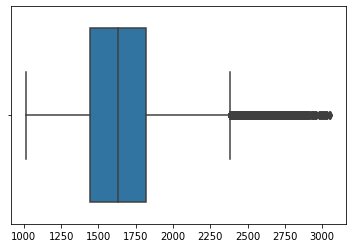

In [4]:
sns.boxplot(data.values)

In [5]:
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

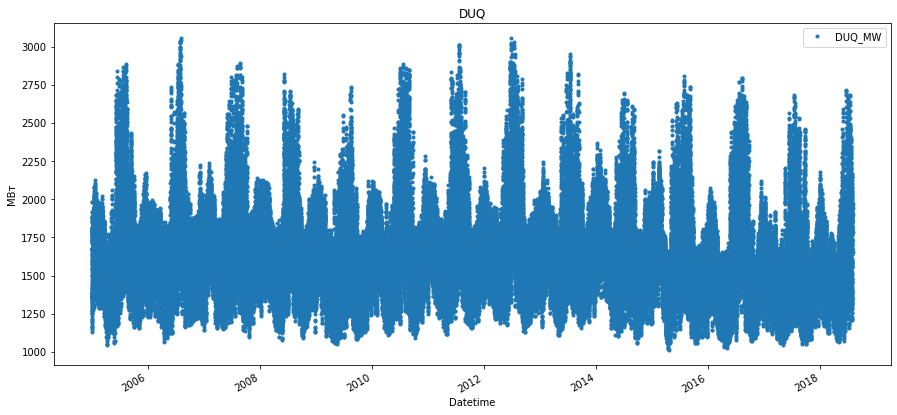

In [6]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ' )
plt.ylabel ( 'МВт' )

In [11]:
data['DUQ_MW'] = data['DUQ_MW'].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   DUQ_MW  119068 non-null  int64
dtypes: int64(1)
memory usage: 6.8 MB


In [17]:
data.index.unique().shape[0], data.shape[0]

(119064, 119068)

In [18]:
count_data = data.index.value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64

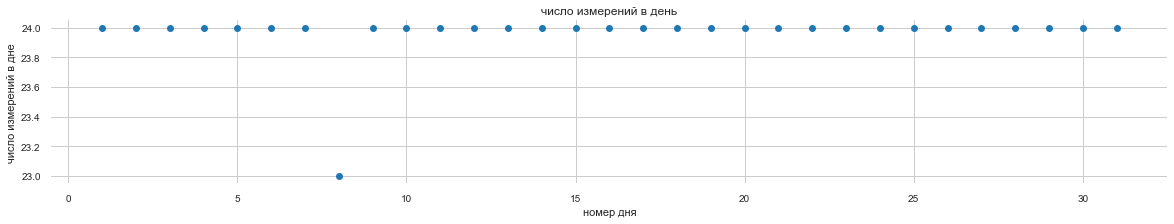

In [19]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day>1 

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.grid()
plt.show()

In [20]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

8    23
Name: Datetime, dtype: int64

In [21]:
data['2015-03-08 01:00:00':'2015-03-08 06:00:00'].index

DatetimeIndex(['2015-03-08 01:00:00', '2015-03-08 02:00:00',
               '2015-03-08 04:00:00', '2015-03-08 05:00:00',
               '2015-03-08 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

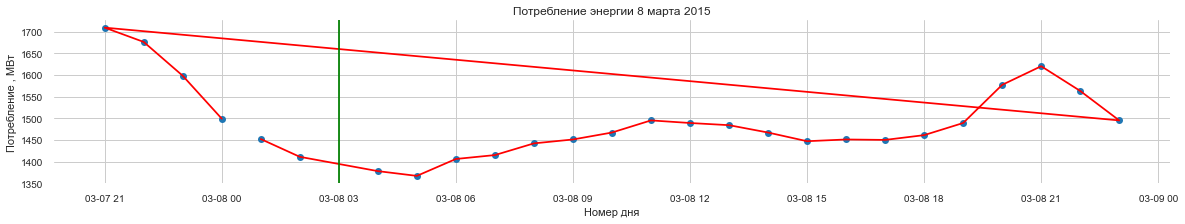

In [23]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-07 21:00:00':'2015-03-08 23:00:00'].index,
         data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2015-03-07 21:00:00':'2015-03-08 23:00:00'].index,
         data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')

plt.axvline(pd.to_datetime('2015-03-08 03:00:00'), color = 'green')
plt.xlabel('Номер дня')
plt.ylabel('Потребление , МВт')
plt.title('Потребление энергии 8 марта 2015')
plt.grid()

plt.show()

В данных нет пропусков, каких либо явных аномалий. 4 значения имеют дубли в индексе. Они обусловлены переводом часов  
осенбю/весной.

### Задание 3
Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [2]:
data = pd.read_excel('brent.xlsx', index_col=[0], parse_dates=[0])
data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [3]:
data.index.rename('date', inplace=True)
data['Значение'].rename('cost', inplace=True)
data.head()

,Значение
date,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [4]:
data['Значение'] = data['Значение'].rename('cost')
data = data.loc[:, ['cost']]
data.head()

KeyError: "None of [Index(['cost'], dtype='object')] are in the [columns]"

In [16]:
data = data.sort_index()

### Задание 3
Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [17]:
data_1W = data.resample('W').mean()
data_1W.head()

,Значение
date,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [18]:
data_1M = data.resample('M').mean()
data_1M.head()

,Значение
date,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [19]:
data_1Y = data.resample('Y').mean()
data_1Y.head()

,Значение
date,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


### Задание 4
Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных,  
месячных и годовых группах для Brent.

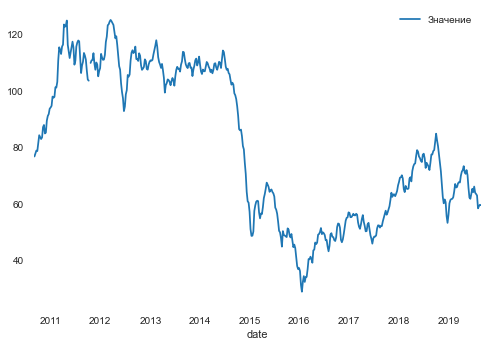

In [20]:
data_1W.plot()

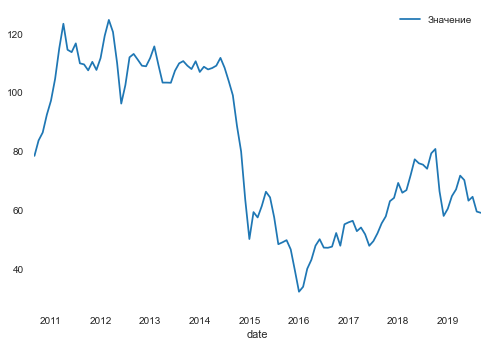

In [21]:
data_1M.plot()

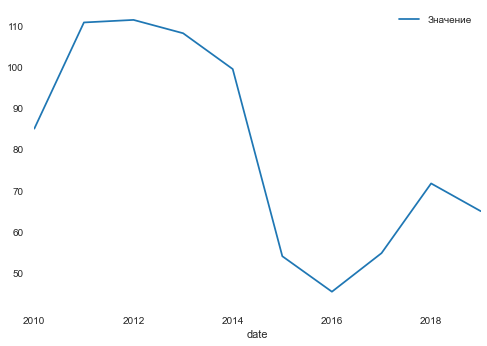

In [22]:
data_1Y.plot()

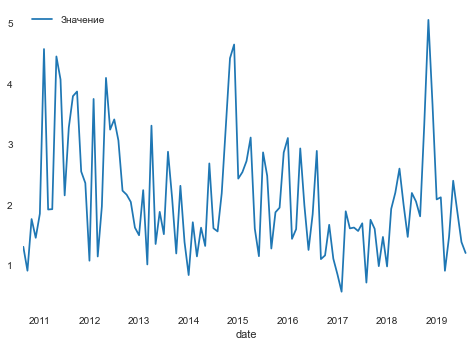

In [23]:
data_1M_std = data.resample('M').std()
data_1M_std.plot()

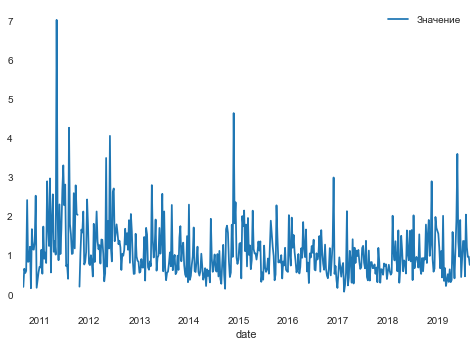

In [24]:
data_1W_std = data.resample('W').std()
data_1W_std.plot()

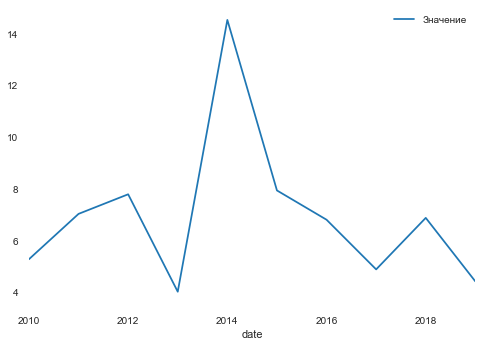

In [25]:
data_1Y_std = data.resample('Y').std()
data_1Y_std.plot()